# Generae sample paths for CEV

Note, here we use a first-order Euler scheme.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Example usage
T = 1       # Total time
n = 100     # Number of time steps
r = 0.03   # Drift coefficient
σ = 0.25 # Volatility coefficient
S0 = 100    # Initial stock value
dim = 10    # Number of paths to simulate
γ = 1.5     # parameter governing elasticity with respect to price

In [3]:
def CEV(T,n,r,σ,γ,S0,dim):
    """
    Generate CEV paths.

    Parameters:
    S0 (float): Initial asset value
    T (float): Total time period
    r (float): Risk-free interest rate
    σ (float): Volatility coefficient for diffusion
    γ (float): parameter governing elasticity with respect to price
    n (int): Number of time steps
    dim (int): Number of paths to simulate

    Returns:
    np.ndarray: Simulated paths of the asset price
    """ 
    Δ = T/n  # equidistant tep length
    Z = np.random.normal(0, 1, (n, dim))  # White noise (drawn all at once)
    S = np.full((n+1, dim), np.nan)  # Space for CEV model
    S[0,:] = S0  # Set initial values
    # Simulation using the Euler-Maruyama method for the CEV model
    for i in range(n):
        S[i+1,:] = S[i,:] + r*S[i,:]*Δ + σ*S[i,:]**(γ/2)*np.sqrt(Δ)*Z[i,:]
        
    return S

CEV_paths = CEV(T,n,r,σ,γ,S0,dim)

In [4]:
# Define time interval 
time = np.linspace(0, T, n+1)
tt = np.broadcast_to(time[:, None], (n+1, dim))

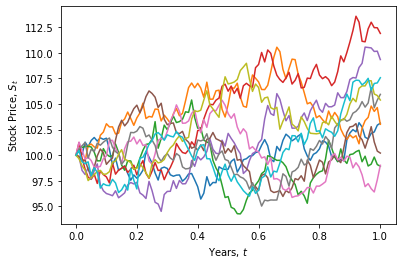

In [5]:
# plot
plt.plot(tt, CEV_paths)
plt.xlabel("Years, $t$")
plt.ylabel("Stock Price, $S_t$")
plt.show()